# Import libraries

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import RobustScaler    
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor


# Load dataset

In [400]:
df=pd.read_csv("boston.csv")

In [401]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [402]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [403]:
df.drop(columns=["Unnamed: 0"],axis=0,inplace=True)    #delete unwanted column from dataset
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [309]:
df.describe().T   

#stats description of only numerical featues 
# count- count of col
# mean- avg of elements of col
# std- the variation from the mean
# min- lowest values
# max- highest value
# 25%- 25% of dat lies below this values
# 50%-55% of dat lies below this values
# 75%-75% of dat lies below this values

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [310]:
df.isnull().sum()    #no any missing values so not required to fill or drop any values from fetures

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [311]:
df.info()         #no catogrical value all feature in  are numerical # no encoding 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# EDA and Preprocessing on data

<AxesSubplot:>

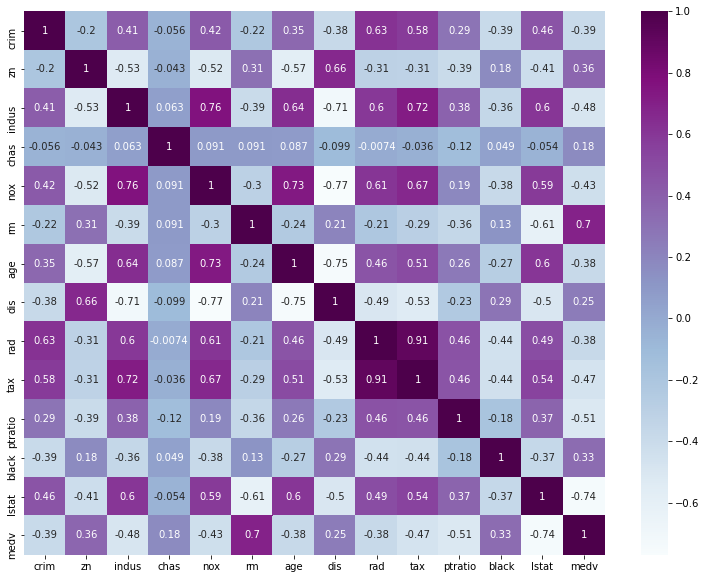

In [399]:
# constructing a heatmap to understand the correlation.
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')

#as per coorelation heatmap rm and lstat most correlated with target feature than other independent feature.

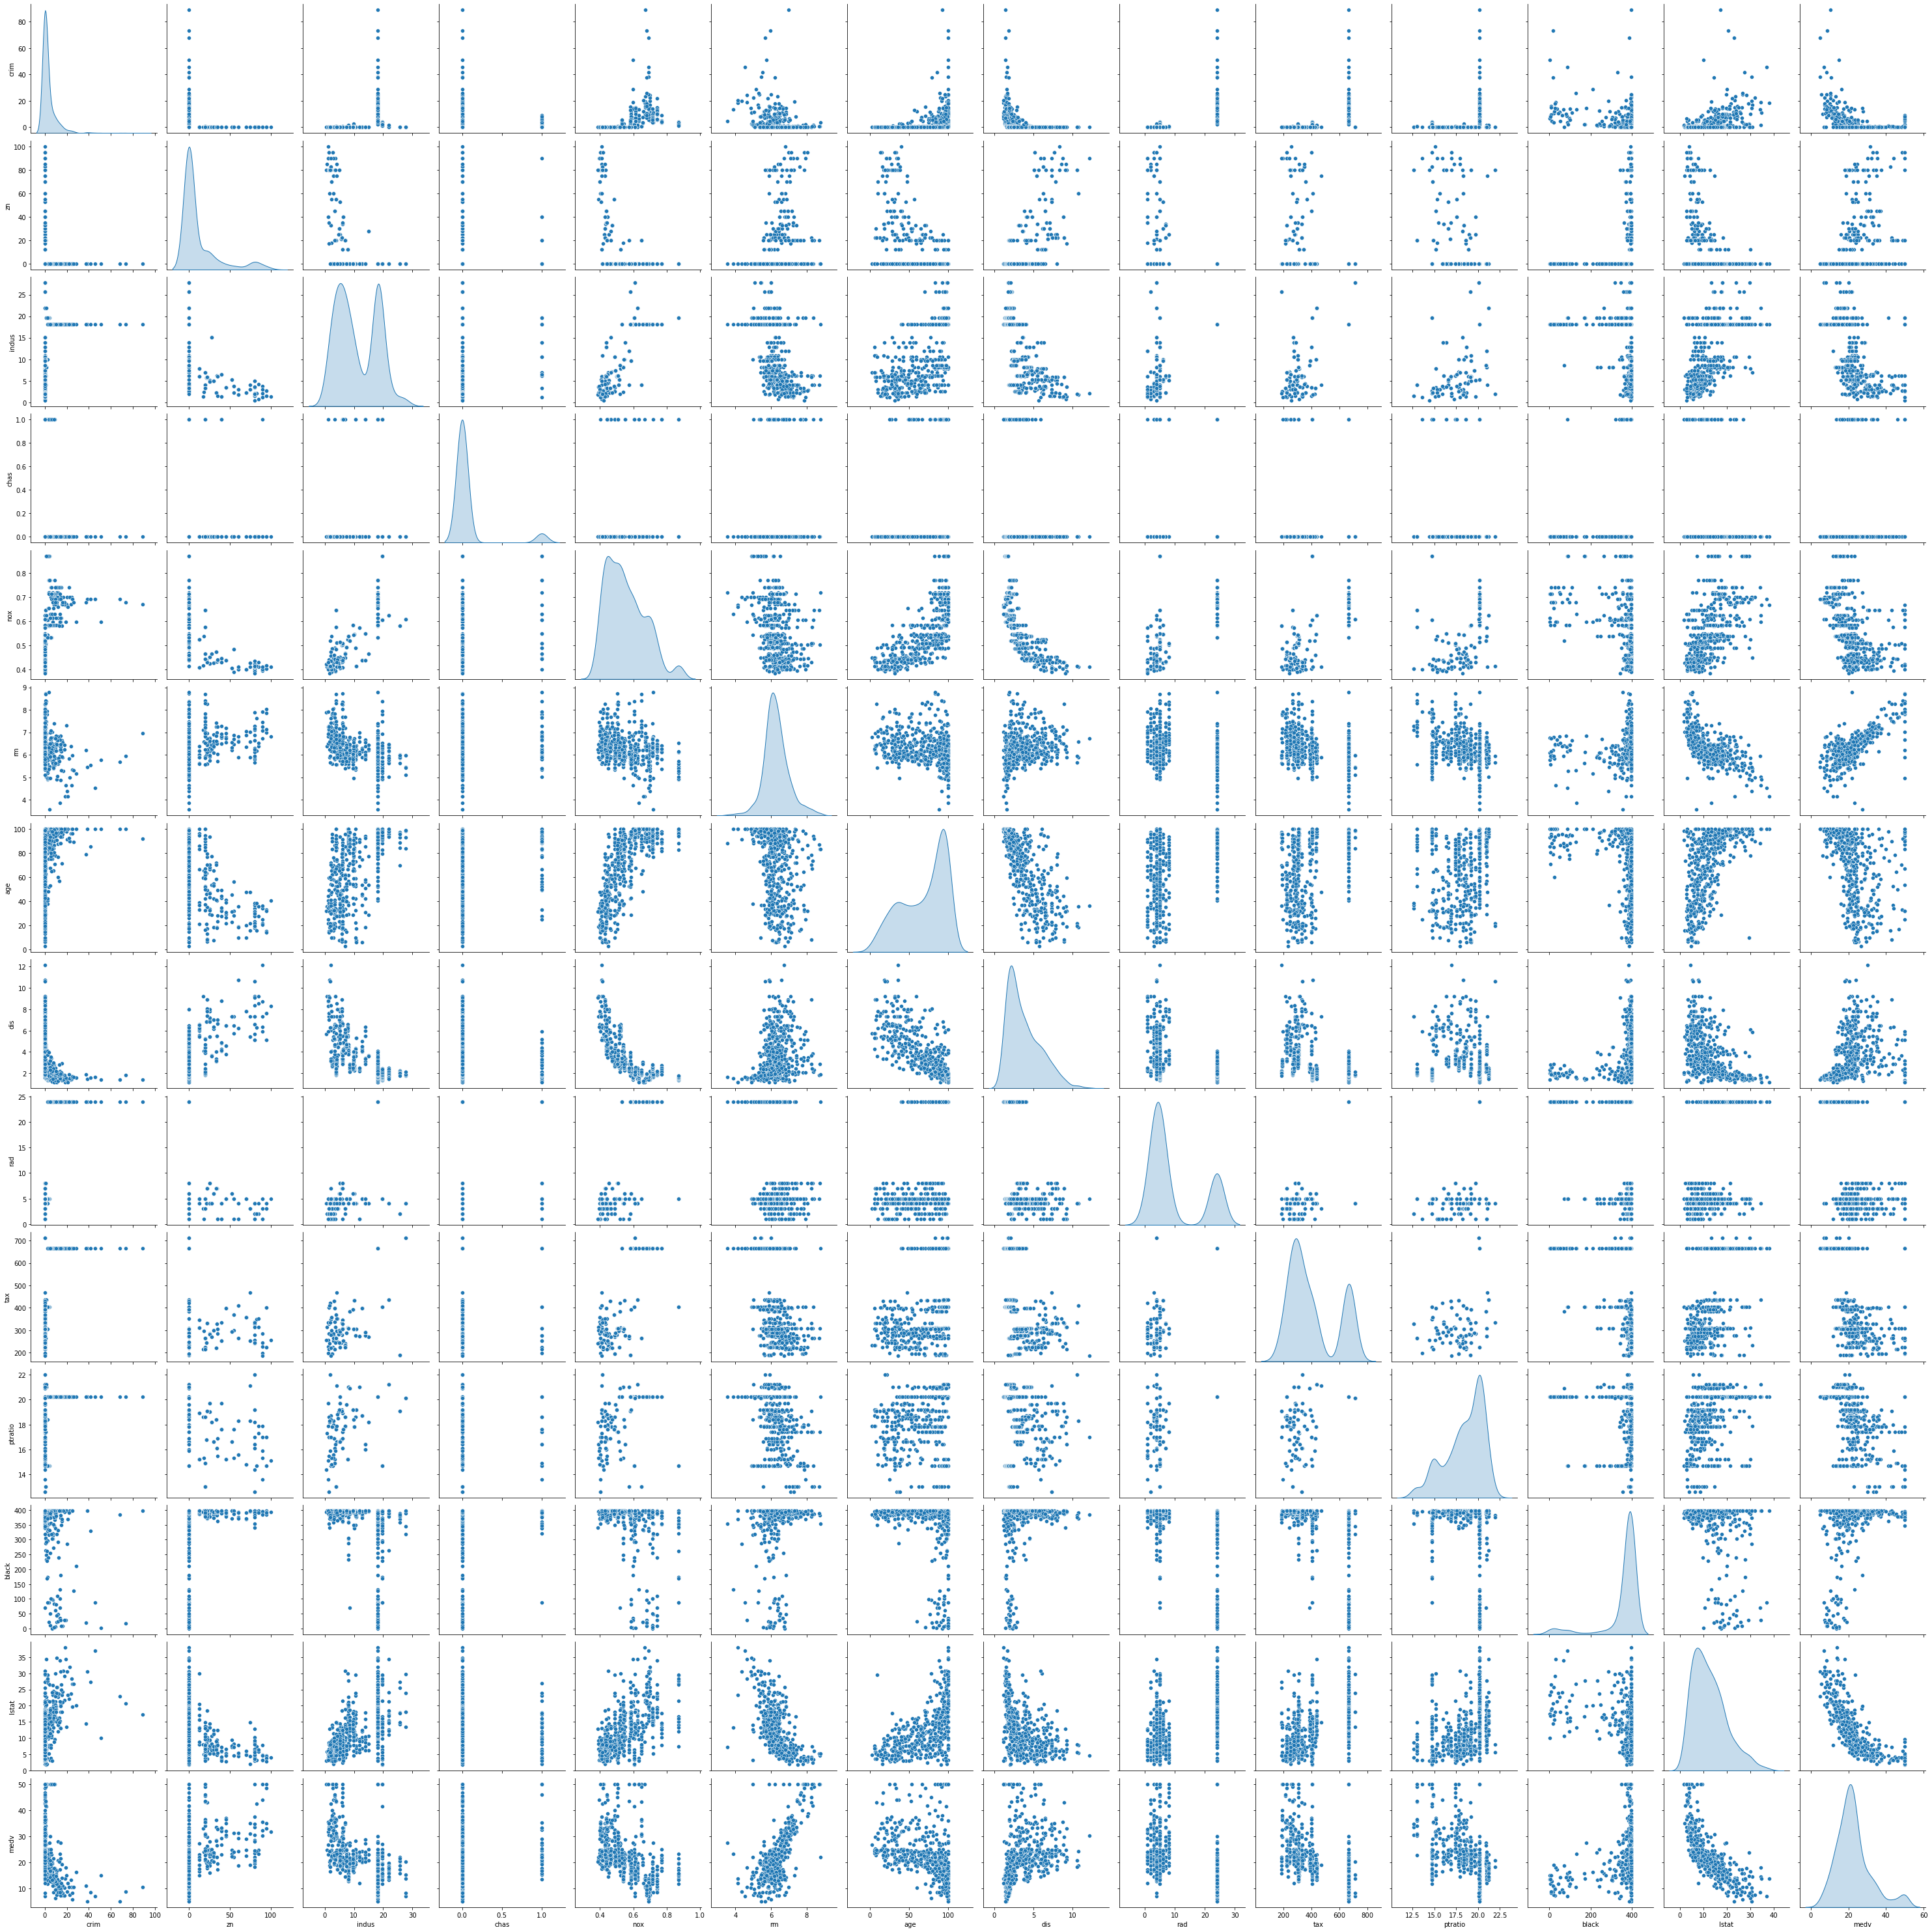

In [20]:
sns.pairplot(df,diag_kind="kde",height=3)

# by visualizing we can see that linearity between [rm , lstat] and medv is more than other varibale .
#so this 2 feature showing more impact on target variable .

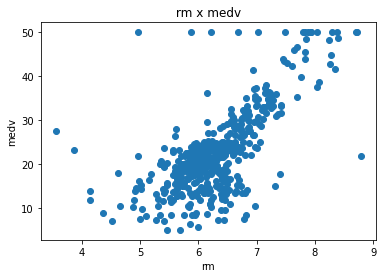

In [23]:
plt.scatter(df['rm'], df['medv'])  # more linearity/correlation betw rm and medv .

plt.xlabel("rm")
plt.ylabel("medv")
plt.title(" rm x medv ")
plt.show()

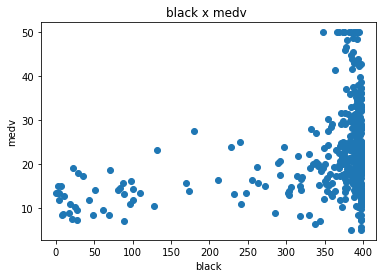

In [397]:
plt.scatter(df['black'], df['medv'])           #black feature not showing too much linearity for target varib

plt.xlabel("black")
plt.ylabel("medv")
plt.title("black x medv ")
plt.show()

In [312]:
df.drop(columns='black',inplace=True)   #bcs of linearity /correltion here we drop black coulumn.

<AxesSubplot:xlabel='medv', ylabel='Density'>

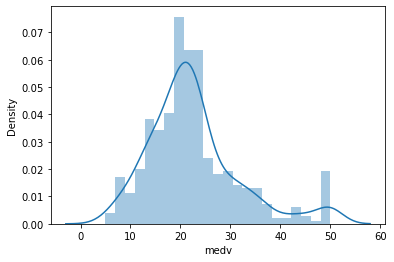

In [56]:
sns.distplot(df["medv"])         #target varibale is normally distrubuted showing price in from 0 to 60.

<AxesSubplot:xlabel='lstat', ylabel='Density'>

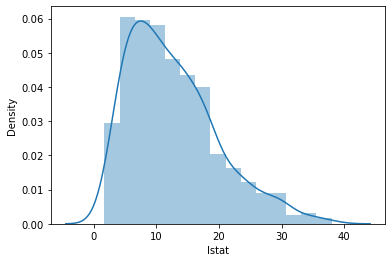

In [322]:
sns.distplot(df["lstat"])       #target varibale is normally distrubuted showing price in from 1 to 40.

<AxesSubplot:xlabel='age', ylabel='Density'>

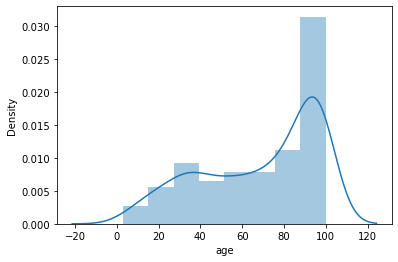

In [57]:
sns.distplot(df["age"]) 

<AxesSubplot:title={'center':'Charles River count '}, xlabel='chas', ylabel='count'>

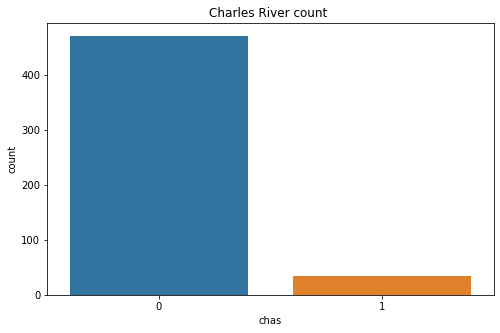

In [58]:
plt.figure(figsize=(8,5))            # 0 = non river bound site 1 = Charles River bound site
plt.title("Charles River count ")
sns.countplot(df['chas'])

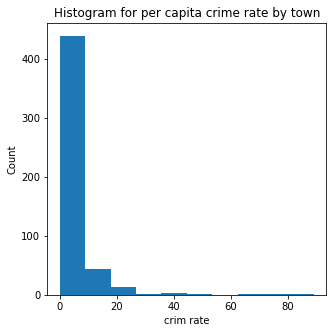

In [314]:
plt.figure(figsize=(5,5))
plt.title("Histogram for per capita crime rate by town")
plt.hist(df['crim'])
plt.xlabel("crim rate")
plt.ylabel("Count")
plt.show()

# showing right skewness in crim 

In [315]:
df['crim']=np.log(df['crim'])    # using log trasnsformation on crim feature for remove skewness

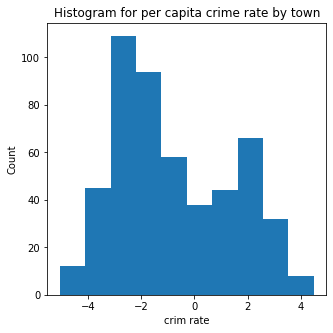

In [316]:
plt.figure(figsize=(5,5))                               
plt.title("Histogram for per capita crime rate by town")
plt.hist(df['crim'])
plt.xlabel("crim rate")
plt.ylabel("Count")
plt.show()
#now data is normally distrubuted skwness is removed by log trasformation

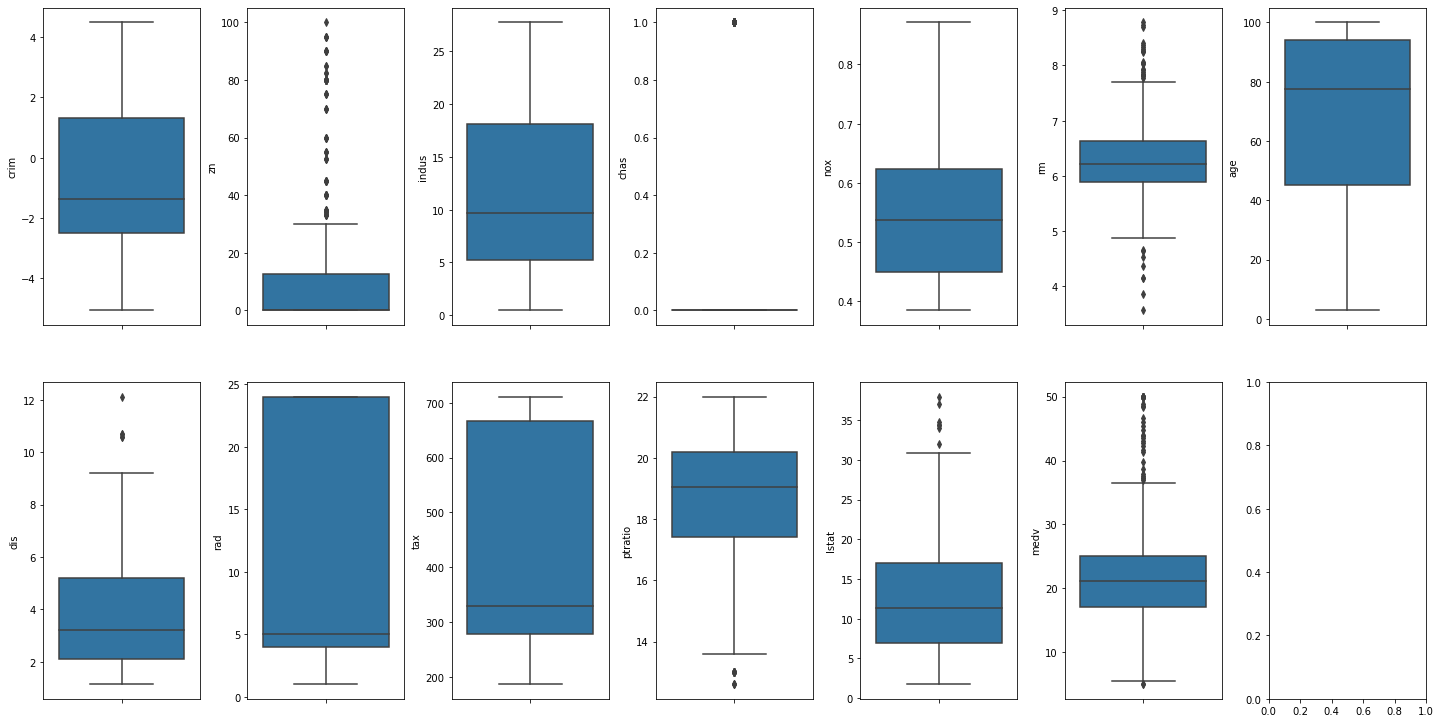

In [388]:
# create box plots for checking outlier 
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


# so as per obesrvation there are outlier in zn,rn.
# for outlier handling we will use robust_scaler on data after split.

# Split into independent and dependent varibale.

In [320]:
X = df.drop(columns=['medv'], axis=1)
Y = df['medv']

# Splitting the data into Training data and Test data

In [278]:
# train the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.25)

In [324]:
#  for handling outlier here we try with robust outlier technique
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

# Model Fitting

# 1) LinearRegression model 

In [373]:

#model fitting 
model1=LinearRegression()
model1.fit(x_train,y_train)

# predict the training set

y_pred = model1.predict(x_test)


print("Model evalution ")
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("R squared value" ,metrics.r2_score(y_test,y_pred))

Model evalution 
RMSE 4.548774428777757
MAE 2.9714526705043145
R squared value 0.7045238785398378


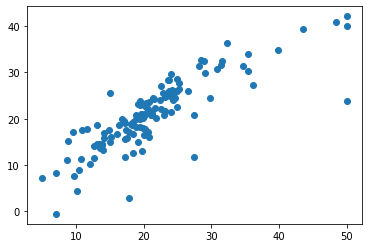

In [374]:
#how data fit(correlation) after model fitting by scatter plot.
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='medv', ylabel='Density'>

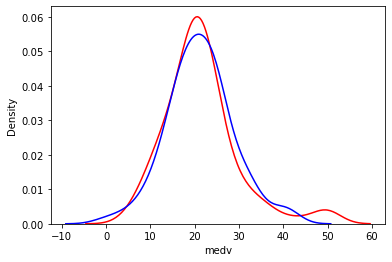

In [375]:
#here find how predication(Red=actual ,Blue=predication) fit on actual data.

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# 2)RandomForestRegressor model 

In [377]:
#model fitting 
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

# predict the training set

y_pred = model2.predict(x_test)




print("Model evalution ")
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("R squared value" ,metrics.r2_score(y_test,y_pred))

Model evalution 
RMSE 3.1189734556938506
MAE 2.0898425196850394
R squared value 0.8610825044450137


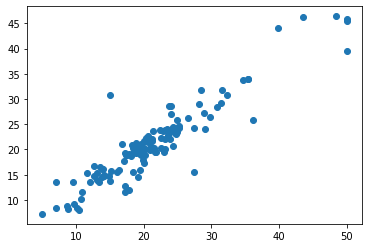

In [378]:
#how data fit(correlation) after model fitting by scatter plot.
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='medv', ylabel='Density'>

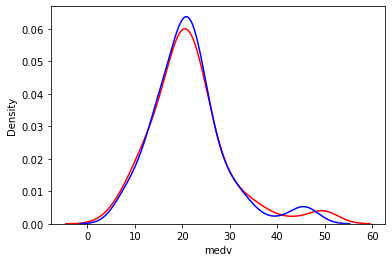

In [379]:
#here find how predication(Red=actual ,Blue=predication) fit on actual data.

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# 3) AdaBoostRegressor model 

In [380]:
#model fitting 
model3=AdaBoostRegressor()
model3.fit(x_train,y_train)

# predict the training set

y_pred = model3.predict(x_test)



print("Model evalution ")
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("R squared value" ,metrics.r2_score(y_test,y_pred))

Model evalution 
RMSE 4.158798861925652
MAE 2.779558130065918
R squared value 0.7530156583375767


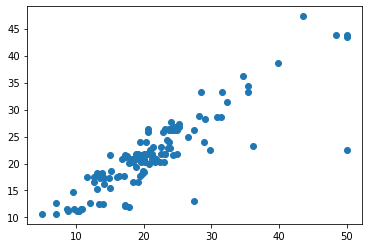

In [381]:
#how data fit(correlation) after model fitting by scatter plot.
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='medv', ylabel='Density'>

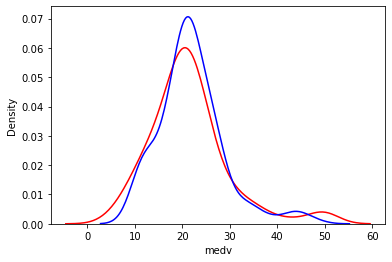

In [382]:
#here find how predication(Red=actual ,Blue=predication) fit on actual data.

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# 4) XGBRegressor Model

In [383]:
#model fitting 
model4=XGBRegressor()
model4.fit(x_train,y_train)

# predict the training set

y_pred = model4.predict(x_test)



print("Model evalution ")
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("R squared value" ,metrics.r2_score(y_test,y_pred))

Model evalution 
RMSE 3.1541106084325015
MAE 2.075064361001563
R squared value 0.8579348919421852


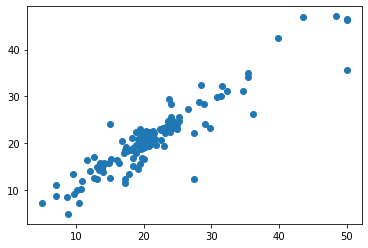

In [384]:
#how data fit(correlation) after model fitting by scatter plot.
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='medv', ylabel='Density'>

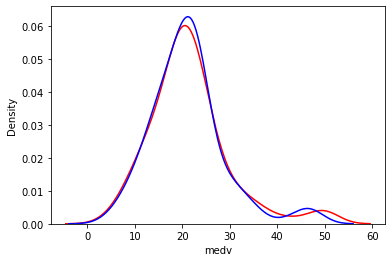

In [385]:
#here find how predication(Red=actual ,Blue=predication) fit on actual data.

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Comparison between models for best model.

In [405]:
models = pd.DataFrame({
    'Model':          ['Linearregression', 'Randomforest', 'Adaboost', 'Xgb'],
    'R-squared Score': [0.7045*100, 0.8610*100, 0.7530*100, 0.8579*100],
    "MAE": [2.9714,2.0898,2.7795,2.0750]})

models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,MAE
1,Randomforest,86.10,2.0898
3,Xgb,85.79,2.0750
2,Adaboost,75.30,2.7795
0,Linearregression,70.45,2.9714
